# DAT 3.20: Day I

## Objectives

### Use basic Shell commands

* `pwd`
* `ls`
* `mkdir`
* `cd`
* `touch`
* `rm`

### Use basic git commands

* `init`
* `add`
* `commit`
* `push`
* `pull`
* `remote` and GitHub.



### Get comfortable with IPython Notebook

* How to start IPython Notebook
* How to read data into pandas
* How to do simple manipulations on pandas dataframes

### More Matplotlib and Customizations

* Add typical features to a plot
* Explore `plt.scatter()`
* Customize a basic bar plot with `plt.bar()`





## UNIX and the Shell

A number of shell commands can be executed in the Jupyter notebook, preface by the exclamation point `!`.


In [8]:
!ls

images               starter-code-1.ipynb


In [9]:
!pwd

/Users/NYCMath/Desktop/GA-DataScience-mar20/lessons/lesson-01/code/starter-code



## Try it yourself!
Read and run the block of code below by: 
1. Clicking on it and pressing the play button above or
2. Using a short cut- (help --> keyboard shortcuts)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

mpl.rcParams['figure.figsize'] = (15, 6)
pd.set_option('display.width', 4000)
pd.set_option('display.max_columns', 100)

# First: Read in the data
### Review Simple Commands

Practice downloading and reading into sample data

In [3]:
# Download and read the data (this may take more than 1 minute)
orig_data = pd.read_csv('../../assets/dataset/311-service-requests.csv', parse_dates=['Created Date'], low_memory=False)

In [6]:
orig_data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Status', 'Due Date', 'Resolution Action Updated Date', 'Community Board', 'Borough', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location'], dtype='object')

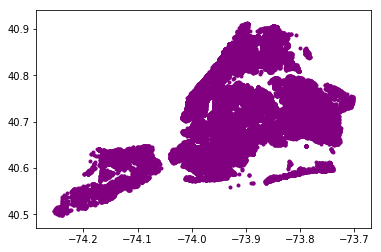

In [4]:
plt.scatter(orig_data['Longitude'], orig_data['Latitude'], marker='.', color="purple")

In [5]:
orig_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,2013-10-31 02:08:41,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,2013-10-31 02:01:04,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,2013-10-31 02:00:24,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,2013-10-31 01:56:23,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,2013-10-31 01:53:44,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


## Try this Example: 
Graph the number of noise complaints each hour in New York

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until


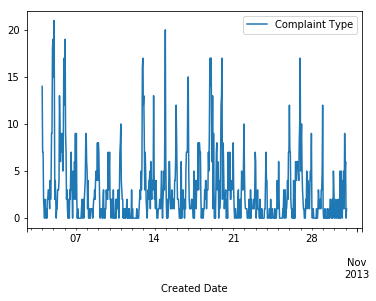

In [10]:
complaints = orig_data[['Created Date', 'Complaint Type']]
noise_complaints = complaints[complaints['Complaint Type'] == 'Noise - Street/Sidewalk']
noise_complaints.set_index('Created Date').sort_index().resample('H', how=len).plot()

In [11]:
orig_data.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                               object
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                              object
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [12]:
by_borough = orig_data[['Latitude', 'Longitude', 'Borough']]

In [13]:
by_borough.head()

,Latitude,Longitude,Borough
0,40.708275,-73.791604,QUEENS
1,40.721041,-73.909453,QUEENS
2,40.843330,-73.939144,MANHATTAN
3,40.778009,-73.980213,MANHATTAN
4,40.807691,-73.947387,MANHATTAN


In [14]:
groups = by_borough.groupby('Borough')

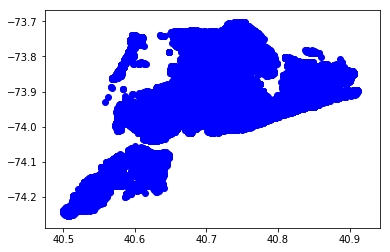

In [46]:
for i in groups:
        plt.scatter(i[1].Latitude, i[1].Longitude, color = 'blue')

In [49]:
groups.groups

{'BRONX': Int64Index([    13,     44,     45,     46,     59,     61,     62,     97,    111,    123,
             ...
             110942, 110961, 110966, 110973, 110988, 110993, 110995, 110996, 110999, 111011], dtype='int64', length=19686),
 'BROOKLYN': Int64Index([     9,     10,     14,     17,     18,     20,     23,     26,     31,     36,
             ...
             111041, 111043, 111046, 111049, 111054, 111055, 111058, 111064, 111067, 111068], dtype='int64', length=32890),
 'MANHATTAN': Int64Index([     2,      3,      4,      8,     11,     12,     15,     19,     21,     27,
             ...
             111048, 111050, 111051, 111052, 111057, 111059, 111060, 111062, 111063, 111066], dtype='int64', length=24288),
 'QUEENS': Int64Index([     0,      1,      5,      6,      7,     22,     35,     39,     40,     65,
             ...
             111004, 111014, 111018, 111024, 111030, 111047, 111053, 111056, 111061, 111065], dtype='int64', length=22281),
 'STATEN ISLAND': In

Text(0,1,'My NYC Map.')

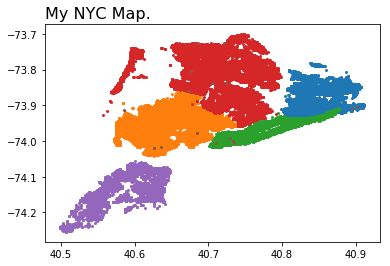

In [71]:
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.Latitude, group.Longitude, marker='o', linestyle='', ms=2, label=name)
plt.title("My NYC Map.", loc = 'left', fontsize = 16)

### More Visualizations

Let's explore some additional plotting capabilities with `Matplotlib`.  

- `plt.bar`
- `plt.hist`
- `plt.boxplot`
- `plt.violinplot`

---

Consider how you can use the data in our originial DataFrame `orig_data` to produce appropriate visualizations. Also, let's see if you can produce subplots that represent the highest complains by borough.  Use the [matplotlib cheatsheet]() as well as the help functions for the plots to determine the appropriate syntax.  For example, 

```python
plt.bar?
```

will provide the help for the `plt.bar()` method.

# Second: Using IPython
### Review Python Basics

Test your skills by answering the following questions:

#### Question 1.  Divide 10 by 20 and set the result to a variable named "A"

In [ ]:
### Insert your code here and then uncomment | print A | when you are ready to test it. 

#print(A)

In [ ]:
#### If you did not get a float (decimals), alter your equation to get the desired result (0.5) 

#### Question 2. Create a function called division that will divide any two numbers and prints the result (with decimals). 
Call your function. Confirm that the results are as expected.

In [ ]:
# add your function here

#### Question 3. Using .split() split my string into separate words in a variable named words

In [ ]:
my_string = "the cow jumped over the moon"
# put your code here it should return ['the', 'cow', 'jumped', 'over', 'the', 'moon']

# print(words)

#### Question 4. How many words are in my_string?

#### Question 5. Use a list comprehension to find the length of each word

result: [3, 3, 6, 4, 3, 4]

#### Question 6. Put the words back together in a variable called sentence using .join()
result:
the cow jumped over the moon

#### Bonus: Add a "||" between each word
result: 
the||cow||jumped||over||the||moon